In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
gao_data = pd.read_csv('data/Gao2018_GaiaEDR3.csv')
mist_data = pd.read_csv('data/MIST_iso_61ca3125bac7d.iso.cmd', header = 12, delim_whitespace = True)

/var/folders/vm/mvlb1j8s3l5_6rj24gvmyxxh0000gn/T/ipykernel_73608/244711501.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mist_data = pd.read_csv('data/MIST_iso_61ca3125bac7d.iso.cmd', header = 12, delim_whitespace = True)


In [3]:
gao_data.head()

,angDist,_RAJ2000,_DEJ2000,E,GaiaDR2,RAJ2000,DEJ2000,PRF,Simbad,ra_epoch2000,...,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr
0,0.178401,133.089120,11.844945,NaN,604907012195819648,133.089120,11.844945,1.0,Simbad,133.089169,...,0.002765,0.005448,0.006213,12.614237,0.002765,169532.00,0.060,0.2929,0.1874,-0.0663
1,0.181233,132.702857,12.002528,NaN,604971020092675328,132.702857,12.002528,1.0,Simbad,132.702907,...,0.002763,0.002870,0.003827,12.631922,0.002763,166793.00,-0.005,0.2601,0.2045,-0.3380
2,0.174741,132.851164,12.211036,NaN,605000745561898240,132.851164,12.211036,1.0,Simbad,132.851212,...,0.002775,0.004965,0.004274,15.915327,0.002775,8106.18,-0.005,0.6963,0.5129,-0.2294
3,0.177507,132.802175,12.188141,NaN,605001329677769088,132.802175,12.188141,1.0,Simbad,132.802223,...,0.002763,0.002900,0.003879,14.222943,0.002763,38527.40,-0.004,0.3660,0.2616,-0.2143
4,0.177719,132.624432,12.135268,NaN,604988784077232384,132.624432,12.135268,1.0,Simbad,132.624481,...,0.002762,0.002880,0.003794,12.430536,0.002762,200785.00,-0.004,0.2375,0.2009,-0.3802


In [4]:
# [p for p in gao_data.columns]
1/gao_data["parallax"]

0       0.832639
1       0.888099
2       0.860956
3       0.883080
4       0.870398
          ...   
1497    1.139212
1498    1.276813
1499    2.180549
1500    1.018849
1501    1.477541
Name: parallax, Length: 1502, dtype: float64

- 'angDist'
- '_RAJ2000'
- '_DEJ2000'
- 'E'
- 'GaiaDR2'
- 'RAJ2000'
- 'DEJ2000'
- 'PRF'
- 'Simbad'
- 'ra_epoch2000'
- 'dec_epoch2000'
- 'errHalfMaj'
- 'errHalfMin'
- 'errPosAng'
- 'source_id'
- 'ra'
- 'ra_error'
- 'dec'
- 'dec_error'
- 'parallax'
- 'parallax_error'
- 'parallax_over_error'
- 'pm'
- 'pmra'
- 'pmra_error'
- 'pmdec'
- 'pmdec_error'
- 'astrometric_n_good_obs_al'
- 'astrometric_gof_al'
- 'astrometric_chi2_al'
- 'astrometric_excess_noise'
- 'astrometric_excess_noise_sig'
- 'astrometric_params_solved'
- 'pseudocolour'
- 'pseudocolour_error'
- 'visibility_periods_used'
- 'ruwe'
- 'duplicated_source'
- 'phot_g_mean_flux'
- 'phot_g_mean_flux_error'
- 'phot_g_mean_mag'
- 'phot_bp_mean_flux'
- 'phot_bp_mean_flux_error'
- 'phot_bp_mean_mag'
- 'phot_rp_mean_flux'
- 'phot_rp_mean_mag'
- 'phot_bp_rp_excess_factor'
- 'dr2_radial_velocity'
- 'dr2_radial_velocity_error'
- 'dr2_rv_nb_transits'
- 'dr2_rv_template_teff'
- 'dr2_rv_template_logg'
- 'panstarrs1'
- 'sdssdr13'
- 'skymapper2'
- 'urat1'
- 'phot_g_mean_mag_error'
- 'phot_bp_mean_mag_error'
- 'phot_rp_mean_mag_error'
- 'phot_g_mean_mag_corrected'
- 'phot_g_mean_mag_error_corrected'
- 'phot_g_mean_flux_corrected'
- 'phot_bp_rp_excess_factor_corrected'
- 'ra_epoch2000_error'
- 'dec_epoch2000_error'
- 'ra_dec_epoch2000_corr'

In [5]:
mist_data.head()

,EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],Bessell_U,...,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,phase
0,226,9.65,0.113136,0.113135,3.469524,5.204566,-2.887418,0.0,0.042210,18.051157,...,12.108379,13.386523,15.455476,15.498421,12.083219,11.960443,13.405561,15.480445,12.080176,0.0
1,227,9.65,0.117447,0.117447,3.472544,5.194228,-2.849816,0.0,0.042257,17.836487,...,11.988333,13.256105,15.270314,15.313213,11.963407,11.845152,13.275225,15.295070,11.960216,0.0
2,228,9.65,0.121829,0.121829,3.475614,5.183721,-2.811595,0.0,0.042306,17.621468,...,11.867548,13.124514,15.084145,15.127029,11.842855,11.729138,13.143710,15.108683,11.839545,0.0
3,229,9.65,0.126400,0.126399,3.478817,5.172763,-2.771730,0.0,0.042361,17.401094,...,11.743056,12.988420,14.892171,14.935066,11.718603,11.609558,13.007692,14.916454,11.715208,0.0
4,230,9.65,0.130769,0.130768,3.481880,5.162288,-2.733616,0.0,0.042416,17.194164,...,11.625242,12.859132,14.710089,14.753011,11.601012,11.496374,12.878467,14.734104,11.597589,0.0


In [6]:
# [print(c) for c in mist_data.columns]

## Mist data columns

- EEP
- og10_isochrone_age_yr
- initial_mass
- star_mass
- log_Teff
- log_g
- log_L
- [Fe/H]_init
- [Fe/H]
- Bessell_U
- Bessell_B
- Bessell_V
- Bessell_R
- Bessell_I
- 2MASS_J
- 2MASS_H
- 2MASS_Ks
- Kepler_Kp
- Kepler_D51
- Hipparcos_Hp
- Tycho_B
- Tycho_V
- Gaia_G_DR2Rev
- Gaia_BP_DR2Rev
- Gaia_RP_DR2Rev
- Gaia_G_MAW
- Gaia_BP_MAWb
- Gaia_BP_MAWf
- Gaia_RP_MAW
- TESS
- Gaia_G_EDR3
- Gaia_BP_EDR3
- Gaia_RP_EDR3
- phase
- bp_rp
- g_mag

### Question 1

In [7]:
star_count = gao_data.shape[0]
print(f"There are {star_count} stars in the dataset.")

There are 1502 stars in the dataset.


### Question 2

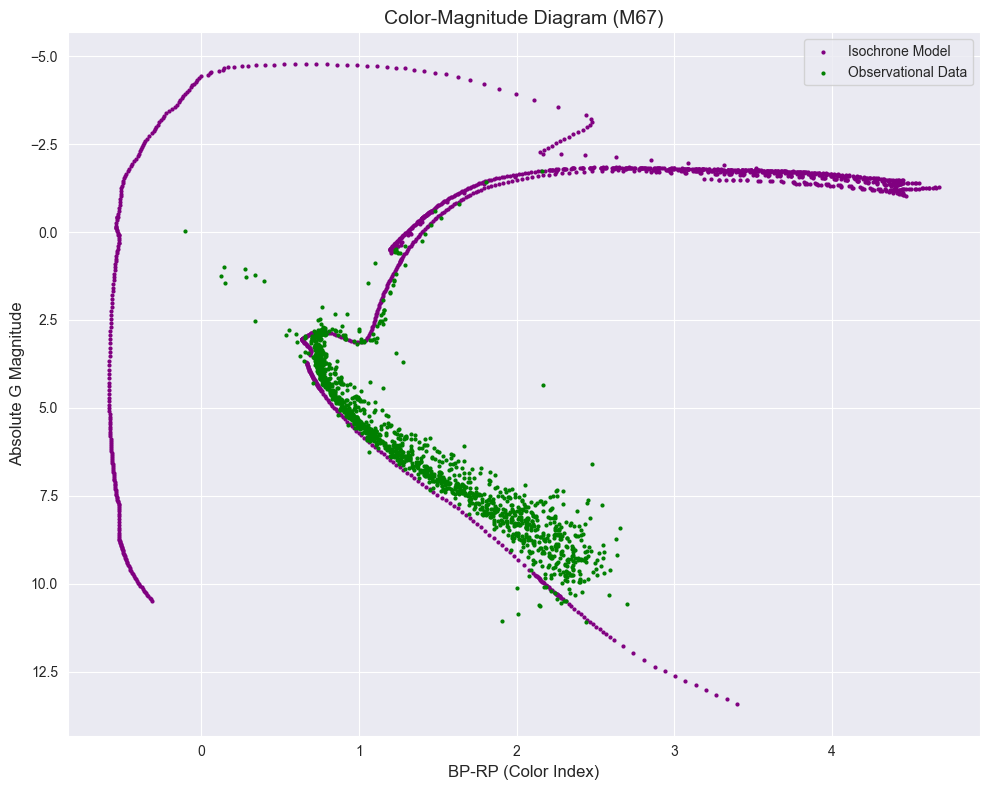

In [14]:
# M67 distance from https://in-the-sky.org/data/object.php?id=M67
M67_DISTANCE_PC = 1000 / 1.1325

def calculate_apparent_magnitude(absolute_magnitude, distance_pc):
    """Convert absolute magnitude to apparent magnitude using the distance modulus formula"""
    return absolute_magnitude - 5 * np.log10(distance_pc) + 5

# Set up the plot
plt.figure(figsize=(10, 8))

# Process Gaia observational data
distances = 1000 / gao_data['parallax']
gao_data['bp_rp'] = gao_data['phot_bp_mean_mag'] - gao_data['phot_rp_mean_mag']
gao_data['g_mag'] = gao_data['phot_g_mean_mag'] - 5 * np.log10(distances) + 5

# Process MIST model data
mist_data['bp_rp'] = mist_data['Gaia_BP_EDR3'] - mist_data['Gaia_RP_EDR3']
mist_data['g_mag'] = mist_data['Gaia_G_EDR3']

# Create Color-Magnitude Diagram
plt.scatter(mist_data['bp_rp'], mist_data['g_mag'], 
           color='purple', s=4, label='Isochrone Model')
plt.scatter(gao_data['bp_rp'], gao_data['g_mag'],
           color='green', s=4, label='Observational Data')

# Configure plot appearance
plt.gca().invert_yaxis()
plt.xlabel('BP-RP (Color Index)', fontsize=12)
plt.ylabel('Absolute G Magnitude', fontsize=12)
plt.title('Color-Magnitude Diagram (M67)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 4

In [16]:
# Define magnitude bins from -2 to 11 in steps of 0.4
magnitude_bins = np.arange(-2, 11, 0.4)
total_cluster_mass = 0
total_stars = 0

# Calculate color indices
mist_data['bp_rp'] = mist_data['Gaia_BP_EDR3'] - mist_data['Gaia_RP_EDR3']

# Filter MIST data to reasonable color range
mist_color_filtered = mist_data[np.abs(1.5 - mist_data['bp_rp']) < 1.5]

# Calculate absolute magnitudes for observational data
gao_data['abs_mag'] = gao_data['phot_g_mean_mag'] - 5 * np.log10(distances) + 5

# Calculate total mass by summing over magnitude bins
for mag_center in magnitude_bins:
    # Get MIST model stars in magnitude slice
    mist_slice = mist_color_filtered[
        np.abs(mag_center - mist_color_filtered['Gaia_G_EDR3']) < 0.2
    ]
    avg_mass = mist_slice['star_mass'].mean()
    
    # Get observed stars in magnitude slice
    observed_slice = gao_data[np.abs(mag_center - gao_data['abs_mag']) < 0.2]
    num_stars = observed_slice.shape[0]
    
    # Add mass and stars from this slice
    total_cluster_mass += avg_mass * num_stars
    total_stars += num_stars

print(total_cluster_mass, total_stars)

1230.038651259575 1500


To find the age of M67, you match an isochrone to where the stars "turn off" the main sequence. If the isochrone has $age = \log_{10}{9.65}$, then M67 is around $(10^{9.65} \approx 4.4)$ billion years old.

To get the distance, you use the equation:

$$
m_G - M_G = 5 \log_{10}(d) - 5
$$

You play around with \(d\) until the isochrone lines up with the real stars (like from Gao 2018).  This gives a distance of about 800 pc.

To estimate mass, take the average mass from the isochrone in a magnitude range and multiply by the number of real stars (from Gao 2018) in that range. This gives a mass for M67 of about 1230 solar masses.
